In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#9): Which is digit '4'


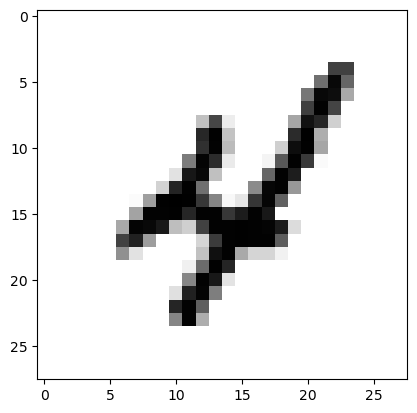

In [26]:
digit = 9 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

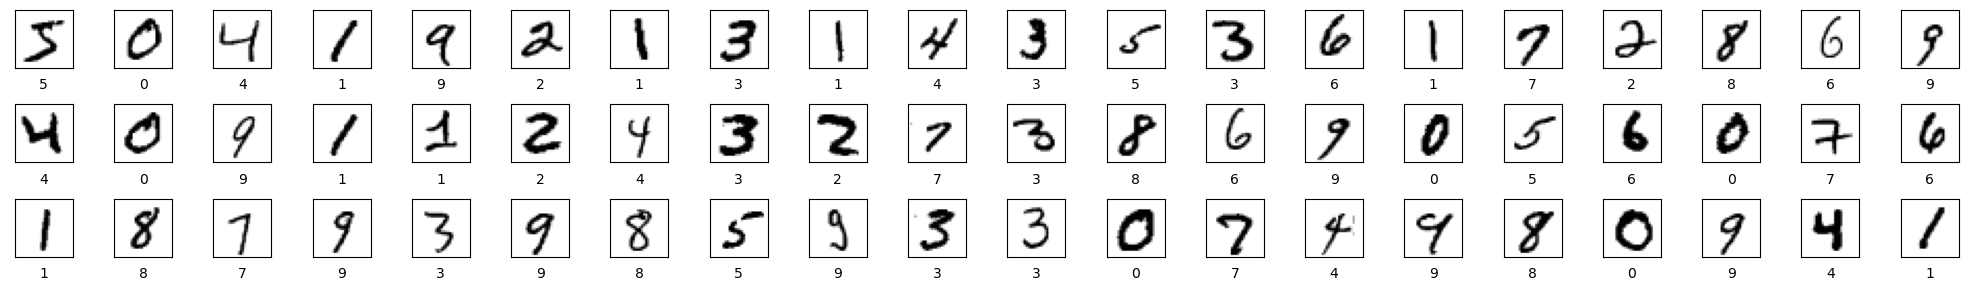

In [27]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

In [28]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

Image (#9): Which is digit '4'


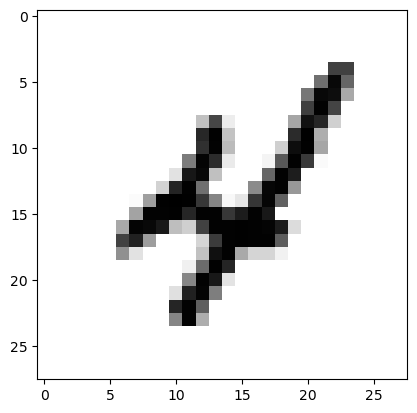

In [29]:
digit = 9 # Change to choose new digit
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [30]:
model = keras.Sequential([
    keras.Input(shape=28*28),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [32]:
h = model.fit(x=x_train, y=y_train, epochs=15, batch_size=64, validation_split=0.3)


Epoch 1/15
657/657 [==============================] - 5s 6ms/step - loss: 0.2720 - accuracy: 0.9213 - val_loss: 0.1383 - val_accuracy: 0.9595
Epoch 2/15
657/657 [==============================] - 3s 5ms/step - loss: 0.1033 - accuracy: 0.9683 - val_loss: 0.1082 - val_accuracy: 0.9675
Epoch 3/15
657/657 [==============================] - 3s 5ms/step - loss: 0.0675 - accuracy: 0.9782 - val_loss: 0.1070 - val_accuracy: 0.9685
Epoch 4/15
657/657 [==============================] - 3s 5ms/step - loss: 0.0488 - accuracy: 0.9848 - val_loss: 0.1006 - val_accuracy: 0.9711
Epoch 5/15
657/657 [==============================] - 3s 5ms/step - loss: 0.0355 - accuracy: 0.9890 - val_loss: 0.1043 - val_accuracy: 0.9695
Epoch 6/15
657/657 [==============================] - 4s 5ms/step - loss: 0.0290 - accuracy: 0.9901 - val_loss: 0.1071 - val_accuracy: 0.9704
Epoch 7/15
657/657 [==============================] - 3s 5ms/step - loss: 0.0210 - accuracy: 0.9930 - val_loss: 0.0939 - val_accuracy: 0.9756
Epoch 

In [33]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [34]:
h1 = model.fit(x=x_train, y=y_train, epochs=15, batch_size=64, validation_split=0.3)


Epoch 1/15
657/657 [==============================] - 4s 5ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.1219 - val_accuracy: 0.9771
Epoch 2/15
657/657 [==============================] - 3s 4ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.1190 - val_accuracy: 0.9774
Epoch 3/15
657/657 [==============================] - 3s 4ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.1176 - val_accuracy: 0.9776
Epoch 4/15
657/657 [==============================] - 3s 4ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.1166 - val_accuracy: 0.9778
Epoch 5/15
657/657 [==============================] - 3s 5ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1161 - val_accuracy: 0.9779
Epoch 6/15
657/657 [==============================] - 3s 5ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.1157 - val_accuracy: 0.9781
Epoch 7/15
657/657 [==============================] - 3s 5ms/step - loss: 9.7690e-04 - accuracy: 0.9999 - val_loss: 0.1153 - val_accuracy: 0.9783
Ep

In [35]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [36]:
h2 = model.fit(x=x_train, y=y_train, epochs=15, batch_size=64, validation_split=0.3)


Epoch 1/15
657/657 [==============================] - 7s 8ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.1276 - val_accuracy: 0.9791
Epoch 2/15
657/657 [==============================] - 5s 8ms/step - loss: 2.7657e-04 - accuracy: 1.0000 - val_loss: 0.1280 - val_accuracy: 0.9793
Epoch 3/15
657/657 [==============================] - 5s 8ms/step - loss: 6.3206e-05 - accuracy: 1.0000 - val_loss: 0.1283 - val_accuracy: 0.9798
Epoch 4/15
657/657 [==============================] - 6s 9ms/step - loss: 2.9016e-05 - accuracy: 1.0000 - val_loss: 0.1306 - val_accuracy: 0.9801
Epoch 5/15
657/657 [==============================] - 5s 8ms/step - loss: 2.7319e-05 - accuracy: 1.0000 - val_loss: 0.1325 - val_accuracy: 0.9802
Epoch 6/15
657/657 [==============================] - 5s 8ms/step - loss: 1.5616e-05 - accuracy: 1.0000 - val_loss: 0.1340 - val_accuracy: 0.9800
Epoch 7/15
657/657 [==============================] - 6s 8ms/step - loss: 1.3175e-05 - accuracy: 1.0000 - val_loss: 0.1354 - val

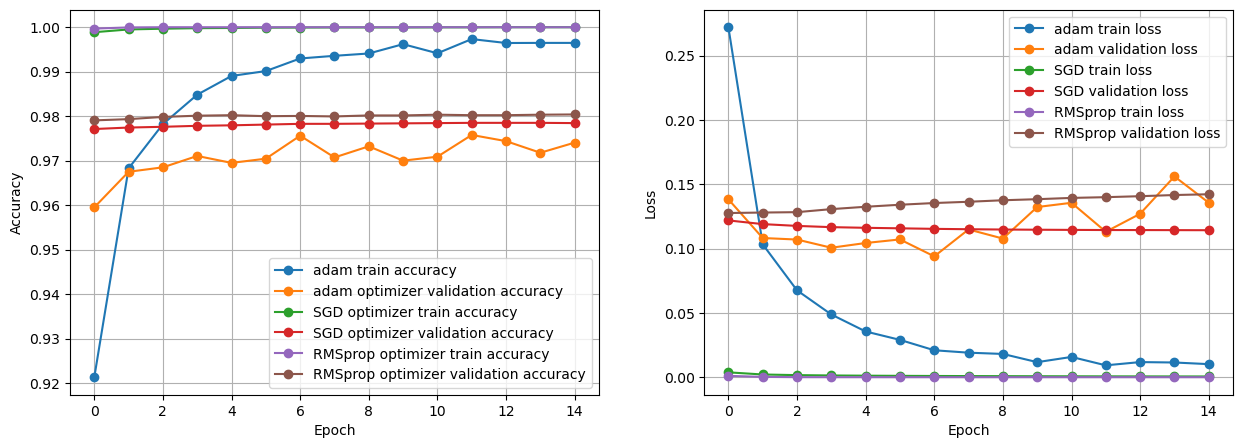

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='adam train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'adam optimizer validation accuracy')

plt.plot(h1.history['accuracy'], 'o-', label='SGD optimizer train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'SGD optimizer validation accuracy')

plt.plot(h2.history['accuracy'], 'o-', label='RMSprop optimizer train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'RMSprop optimizer validation accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='adam train loss')
plt.plot(h.history['val_loss'], 'o-', label='adam validation loss')

plt.plot(h1.history['loss'], 'o-', label='SGD train loss')
plt.plot(h1.history['val_loss'], 'o-', label='SGD validation loss')

plt.plot(h2.history['loss'], 'o-', label='RMSprop train loss')
plt.plot(h2.history['val_loss'], 'o-', label='RMSprop validation loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [38]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1136 - accuracy: 0.9836

Test accuracy: 0.9836000204086304


In [39]:
predictions = model.predict(x_test)


313/313 [==============================] - 1s 2ms/step


4/4 [==============================] - 0s 2ms/step


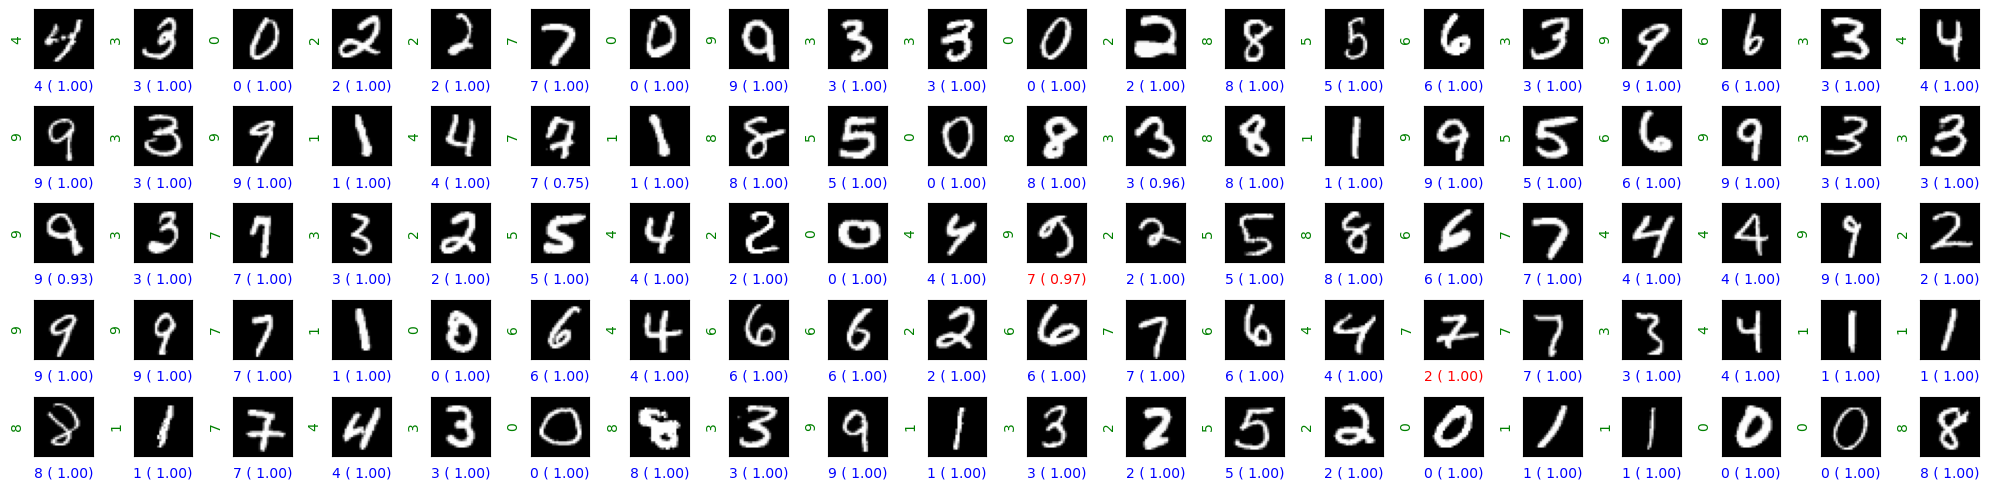

In [40]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [41]:
def test(i):
    img = x_test[i]
    predictions = model.predict([img.reshape(-1,784)])

    plt.figure()
    plt.imshow(img.reshape(28,28), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])

    plt.ylabel(f"True Label: {y_test[i]}", color='g') # ground truth

    prediction = np.argmax(predictions) 
    confidence = predictions[0][prediction]

    if y_test[i] == prediction:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='b')
    else:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='r')
    plt.show()

1/1 [==============================] - 0s 79ms/step


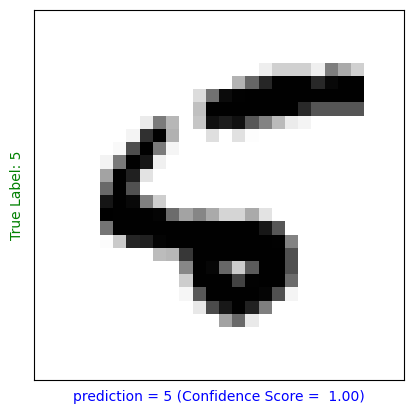

In [42]:
test(8)

1/1 [==============================] - 0s 28ms/step


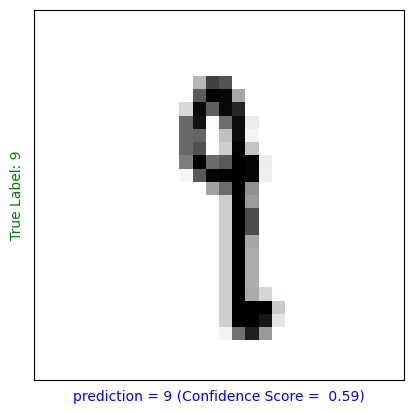

In [43]:
test(4500)

1/1 [==============================] - 0s 34ms/step


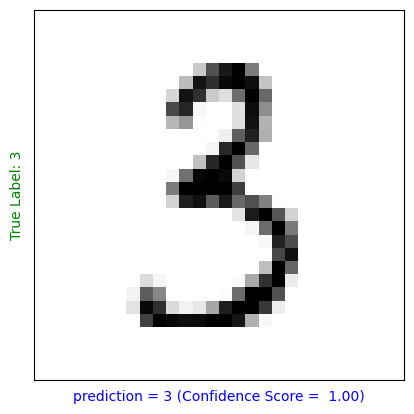

In [44]:
test(76)


1/1 [==============================] - 0s 33ms/step


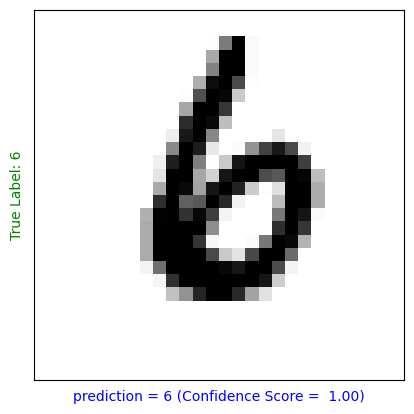

In [45]:
test(2156)
